In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%load_ext autoreload
%autoreload 1
%aimport main
%aimport data_utils
%aimport contrastive_data
%aimport models

In [3]:
from contrastive_data import *
from data_utils import *
from main import *
from models import *

In [4]:
data_path = '/home/lguirardel/data/perturb_comp/data/TP53/'

# Dataset and dataloader

In [5]:
paths = get_paths(data_path)
counts = load_data(*paths, group_wt_like=True)
counts.head()

	Reading files...


	Merging and processing...
		Grouping WT-like variants.
		75 variant classes


,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACCGC-1-17,-0.596154,0.531990,-0.225151,-0.457634,2.961575,-0.256657,-0.221458,-0.522011,-0.776960,-0.250380,...,-0.375927,-1.206934,-0.125262,-0.388237,0.400847,2.126491,-0.369181,-0.329177,G105C,Impactful II
AAACCTGAGAAACCGC-1-6,-0.663882,1.255052,-0.302752,-0.505173,-0.648212,-0.430084,-0.276779,-0.519543,-0.860134,-0.348349,...,-0.333327,1.388696,-0.191153,-0.473405,0.260726,-0.922426,-0.364084,-0.382663,H179Y,Impactful II
AAACCTGAGAATCTCC-1-7,1.156386,0.564536,-0.211433,-0.486104,-0.634354,-0.279616,-0.184077,1.236506,-0.853555,-0.205506,...,-0.333910,-1.152764,-0.112296,-0.333986,0.453716,-0.953237,-0.398251,-0.361999,WT-like,WT-like
AAACCTGAGACAAAGG-1-25,-0.511574,0.411509,-0.149505,-0.445861,0.874412,-0.167284,-0.173591,-0.450341,0.417036,-0.212607,...,3.552692,1.250481,-0.102650,-0.307685,-0.880374,0.307346,1.764831,2.026453,H214R,Impactful II
AAACCTGAGACCGGAT-1-5,-0.660791,0.813802,-0.257539,0.629672,0.154318,-0.356792,-0.253018,0.384113,0.020371,-0.516693,...,-0.388674,-0.981455,-0.073775,-0.513099,0.602043,0.454713,-0.457369,0.921011,V272M,Impactful II


In [6]:
counts.shape

(84778, 1226)

<Axes: >

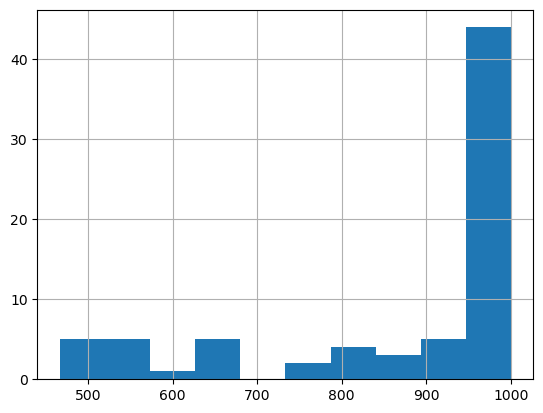

In [11]:
counts.groupby('variant').A1BG.count().drop(index='WT-like').hist()

In [6]:
dfs = df1, df2, df3 = split(counts, )

Train length: 47814
Seen test length  : 15938
Unseen test length: 21026


In [7]:
df1.head()

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACCGC-1-6,-0.663882,1.255052,-0.302752,-0.505173,-0.648212,-0.430084,-0.276779,-0.519543,-0.860134,-0.348349,...,-0.333327,1.388696,-0.191153,-0.473405,0.260726,-0.922426,-0.364084,-0.382663,H179Y,Impactful II
AAACCTGAGAATCTCC-1-7,1.156386,0.564536,-0.211433,-0.486104,-0.634354,-0.279616,-0.184077,1.236506,-0.853555,-0.205506,...,-0.333910,-1.152764,-0.112296,-0.333986,0.453716,-0.953237,-0.398251,-0.361999,P153P,WT-like
AAACCTGAGACAAAGG-1-25,-0.511574,0.411509,-0.149505,-0.445861,0.874412,-0.167284,-0.173591,-0.450341,0.417036,-0.212607,...,3.552692,1.250481,-0.102650,-0.307685,-0.880374,0.307346,1.764831,2.026453,H214R,Impactful II
AAACCTGAGACTGGGT-1-15,-0.543527,0.239849,2.953262,2.675808,0.749126,-0.248930,-0.175068,-0.476121,-1.021328,-0.263211,...,-0.358143,-0.264967,-0.074368,1.742263,0.281749,-1.013422,1.586059,-0.273615,G105C,Impactful II
AAACCTGAGAGTAAGG-1-7,-0.474609,-0.869527,-0.160920,-0.469521,-0.597893,-0.229293,-0.153120,-0.514913,-0.819609,-0.138516,...,2.651627,2.453991,-0.104388,-0.256793,1.861307,-0.950921,-0.371384,-0.327883,R213Q,Impactful I


In [8]:
df2.head()

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
AGAATAGGTGTTTGTG-1-1,-0.514367,0.375125,-0.129008,-0.471325,-0.765647,-0.126202,-0.125974,-0.496334,-0.938769,-0.190227,...,1.886177,-1.102825,-0.124463,-0.302066,1.228996,0.255212,-0.380087,1.935696,I195T,Impactful II
ACACCGGAGGACAGAA-1-10,-0.579580,-0.775137,-0.102964,-0.427259,-0.539143,-0.173034,-0.127412,-0.454766,-0.855177,-0.192537,...,-0.463802,-0.163533,-0.105308,-0.212575,-0.697490,0.526150,-0.424125,4.744210,L194R,Impactful II
CACAGTAGTGTAAGTA-1-26,-0.624924,-0.551342,-0.295380,-0.466041,-0.424105,-0.432414,-0.317607,-0.580522,-0.561309,-0.277721,...,-0.468622,0.979517,4.799287,-0.399126,-0.714647,-0.580834,-0.448339,2.269376,R175H,Impactful II
ACACCCTGTTGGTGGA-1-17,-0.562343,-0.865951,-0.108054,1.693213,2.195663,-0.091859,-0.120859,-0.459464,0.573017,-0.126534,...,-0.365455,-0.157081,-0.116682,-0.254262,1.455904,-0.994950,-0.350185,-0.282103,E2E,WT-like
TCAGGATGTAGGCTGA-1-4,-0.533914,1.019790,-0.109262,-0.408335,-0.581731,-0.145770,-0.078876,-0.416155,-1.111645,-0.221064,...,-0.381596,-0.153920,-0.103957,-0.163794,0.438981,-0.891998,-0.304707,1.790318,A159P,Impactful II


In [9]:
df3.head()

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACCGGAT-1-5,-0.660791,0.813802,-0.257539,0.629672,0.154318,-0.356792,-0.253018,0.384113,0.020371,-0.516693,...,-0.388674,-0.981455,-0.073775,-0.513099,0.602043,0.454713,-0.457369,0.921011,V272M,Impactful II
AAACCTGAGACGCTTT-1-15,1.378268,-0.863627,-0.208345,-0.438053,-0.608762,-0.311683,4.382526,1.505464,-0.852189,-0.225123,...,-0.358738,0.637009,-0.086172,-0.302702,0.684308,-0.930461,-0.327833,-0.292408,T312S,WT-like
AAACCTGAGAGGGATA-1-17,-0.683880,0.167153,-0.401664,1.003890,-0.729751,-0.475796,-0.356987,-0.607136,-0.829336,-0.479676,...,-0.396068,0.925368,-0.135103,-0.617957,-0.901461,-0.924259,1.195525,-0.403081,C277F,Impactful I
AAACCTGAGATCCCGC-1-2,-0.606928,-0.699474,-0.186031,-0.403824,1.050997,-0.253016,-0.203574,4.554702,-0.709961,-0.247970,...,-0.021551,0.412843,-2.904237,-0.292951,2.218822,0.663799,-0.396456,-0.283875,C135F,Impactful II
AAACCTGAGATCCTGT-1-24,0.794072,0.410491,-0.291926,1.335690,1.782292,-0.316929,-0.241230,-0.607818,1.963245,-0.341677,...,1.679643,-1.202425,-0.131359,-0.492669,-0.930619,-0.915976,-0.444691,-0.399836,V216M,Impactful II


In [10]:
dls = dl1, dl2, dl3 = make_loaders(df1, df2, df3, batch_size=128, n_workers=2)


In [44]:
# edit contrastive_data for this to work
(x1, x2), y, i = dl2.dataset[0]
print(i)
print(df2.iloc[0, ].variant)
print(df2.iloc[i, ].variant)
print(y)

12620
I195T
P47S
tensor(False)


In [29]:
Y = dl2.dataset.y
Y.head()

0    I195T
1    L194R
2    R175H
3      E2E
4    A159P
Name: variant, dtype: object

In [32]:
dl2.dataset[1]

((tensor([-0.5796, -0.7751, -0.1030,  ...,  0.5261, -0.4241,  4.7442]),
  tensor([-0.6436, -0.8163, -0.1678,  ...,  0.7667, -0.4091, -0.3225])),
 tensor(False),
 13299)

In [31]:
dl1.dataset.x

tensor([[-0.6639,  1.2551, -0.3028,  ..., -0.9224, -0.3641, -0.3827],
        [ 1.1564,  0.5645, -0.2114,  ..., -0.9532, -0.3983, -0.3620],
        [-0.5116,  0.4115, -0.1495,  ...,  0.3073,  1.7648,  2.0265],
        ...,
        [-0.5854, -0.6378, -0.1144,  ...,  2.7086, -0.4239, -0.3115],
        [-0.5327, -0.8196, -0.1421,  ..., -0.9130, -0.3366, -0.2958],
        [ 1.1221,  1.5525, -0.1241,  ..., -1.0019, -0.3304, -0.2627]])

# Data checks

In [7]:
counts.head()

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACCGC-1-17,-0.596154,0.531990,-0.225151,-0.457634,2.961575,-0.256657,-0.221458,-0.522011,-0.776960,-0.250380,...,-0.375927,-1.206934,-0.125262,-0.388237,0.400847,2.126491,-0.369181,-0.329177,G105C,Impactful II
AAACCTGAGAAACCGC-1-6,-0.663882,1.255052,-0.302752,-0.505173,-0.648212,-0.430084,-0.276779,-0.519543,-0.860134,-0.348349,...,-0.333327,1.388696,-0.191153,-0.473405,0.260726,-0.922426,-0.364084,-0.382663,H179Y,Impactful II
AAACCTGAGAATCTCC-1-7,1.156386,0.564536,-0.211433,-0.486104,-0.634354,-0.279616,-0.184077,1.236506,-0.853555,-0.205506,...,-0.333910,-1.152764,-0.112296,-0.333986,0.453716,-0.953237,-0.398251,-0.361999,WT-like,WT-like
AAACCTGAGACAAAGG-1-25,-0.511574,0.411509,-0.149505,-0.445861,0.874412,-0.167284,-0.173591,-0.450341,0.417036,-0.212607,...,3.552692,1.250481,-0.102650,-0.307685,-0.880374,0.307346,1.764831,2.026453,H214R,Impactful II
AAACCTGAGACCGGAT-1-5,-0.660791,0.813802,-0.257539,0.629672,0.154318,-0.356792,-0.253018,0.384113,0.020371,-0.516693,...,-0.388674,-0.981455,-0.073775,-0.513099,0.602043,0.454713,-0.457369,0.921011,V272M,Impactful II


In [13]:
counts.iloc[:,:-2].mean(axis=0).abs().sort_values().tail()

RPS27A    0.060922
RPS4X     0.062460
RPS3      0.063448
GNB2L1    0.073437
EEF1A1    0.074799
dtype: float64

In [15]:
counts.iloc[:,:-2].std(axis=0).sort_values()

CEACAM6          0.798211
DHRS2            0.811892
RP11-338I21.1    0.815521
ITGA11           0.919316
IGF2             0.920249
                   ...   
ATOH8            1.015919
NPTX1            1.015986
LINC00707        1.017743
HAS2             1.021156
ID4              1.024896
Length: 1224, dtype: float64

# Metrics

In [18]:
from sklearn.metrics import roc_auc_score

In [26]:
from models import ROC_score

In [60]:
d = []
Y = []
for (x1, x2), y in tqdm(dl2,) :
    d.append(torch.norm((x1 - x2), dim=-1))
    Y.append(y)
d = torch.concat(d)
Y = torch.concat(Y)

d = (d - d.min())/(d.max() - d.min())



100%|██████████| 244/244 [00:08<00:00, 28.60it/s]


In [61]:
b1 = torch.distributions.Binomial(100, 0.55*torch.ones_like(Y)).sample()/100
b2 = torch.distributions.Binomial(100, 0.45*torch.ones_like(Y)).sample()/100
d = torch.where(Y, b2, b1) # where y is positive put small d, where y is negative put big d

In [62]:
d*Y

tensor([0.4300, 0.5400, 0.0000,  ..., 0.4400, 0.4700, 0.4700])

In [63]:
score, tpr, fpr = ROC_score(Y, d, eps=1e-3)
print(f"Sklearn : {roc_auc_score(Y, 1-d)}") # predictor score is 1-d : small distance, positive score
print(f"Implementation : {score}")

Sklearn : 0.921078207386485
Implementation : 0.9209496974945068


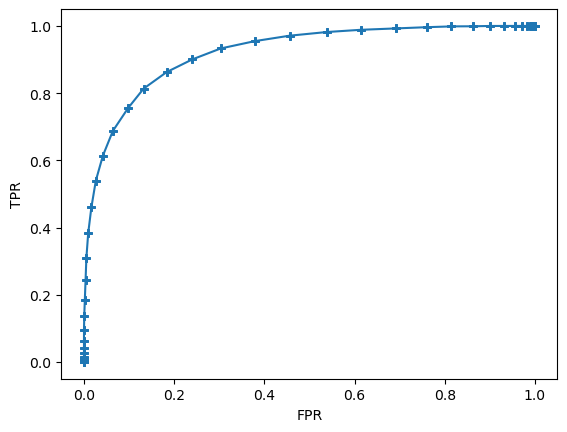

In [65]:
plt.plot(fpr, tpr, '+-')
plt.xlabel('FPR')
plt.ylabel('TPR');

# Memory footprint

In [66]:
from torch.profiler import profile, record_function, ProfilerActivity

In [67]:
run_name = 'TP53_003'
dir_name = join('models',run_name)
! cat models/{run_name}/config.ini
model = torch.load(join(dir_name,'model.pkl'), map_location='cpu')

alpha = 0.0
weight-decay = 0.01
batch-size = 256
lr = 0.001
n-epochs = 10000
loss = standard
margin = 1


In [75]:
with profile(activities=[ProfilerActivity.CPU],
        profile_memory=True, record_shapes=True) as prof:
    (x1, x2), y = next(iter(dl1))
    model(x1, x2)


print(prof.key_averages().table(sort_by="cpu_memory_usage", row_limit=10))

STAGE:2023-10-26 14:35:58 927039:927039 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        91.57%     324.527ms        91.58%     324.554ms     324.554ms       1.20 Mb       1.20 Mb             1  
                                            aten::empty         0.02%      55.000us         0.02%      55.000us       9.167us     364.58 Kb     364.58 Kb             6  
                                         aten::randperm         0.26%     928.000us         0.53%       1.872ms     936.000us     364.56 Kb          -

STAGE:2023-10-26 14:35:59 927039:927039 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-10-26 14:35:59 927039:927039 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


In [88]:
print(f'Model : {32*sum([t.nelement() for t in model.parameters()]):_} Mb')
print(f'Data : {next(iter(dl1))[0][0].nelement() * 32:_} Mb ({dl1.batch_size} batch size)')

Model : 4_307_840 Mb
Data : 5_013_504 Mb (128 batch size)


In [82]:
u = next(iter(model.parameters()))
u.nelement()

122400

In [81]:
import sys
sys.getsizeof(model)

56